In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 한글설정
!apt-get install -y fonts-nanum # 나눔 폰트 다운
# !ls -l /usr/share/fonts/truetype/ # 설치 확인
!rm -rf ~/.cache/matplotlib/* # 남아있는 폰트 캐시 제거
!fc-cache -fv # 폰트 캐시 생성

In [2]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
# Data Read
data = pd.read_csv("../data/장애인복지시설현황.csv")
data

,년도,거주시설,직업재활시설,지역사회재활시설,생산품판매시설,의료재활시설
0,2016,1505,582,1303,17,20
1,2017,1517,625,1333,17,19
2,2018,1527,651,1373,17,19
3,2019,1557,683,1486,17,18


In [4]:
# 년도 컬럼 지우기
data_cp = data.copy()
data_drop = data_cp.drop('년도', axis=1)
data_drop

,거주시설,직업재활시설,지역사회재활시설,생산품판매시설,의료재활시설
0,1505,582,1303,17,20
1,1517,625,1333,17,19
2,1527,651,1373,17,19
3,1557,683,1486,17,18


In [5]:
# 시설 년도별 개수
cat1 = list(data_drop['거주시설'])
cat2 = list(data_drop['직업재활시설'])
cat3 = list(data_drop['지역사회재활시설'])
cat4 = list(data_drop['생산품판매시설'])
cat5 = list(data_drop['의료재활시설'])

print(f"시설 년도별 개수\n거주시설 : {cat1}\n직업재활시설 : {cat2}\n지역사회재활시설 : {cat3}\n생산품판매시설 : {cat4}\n의료재활시설 : {cat5}")

시설 년도별 개수
거주시설 : [1505, 1517, 1527, 1557]
직업재활시설 : [582, 625, 651, 683]
지역사회재활시설 : [1303, 1333, 1373, 1486]
생산품판매시설 : [17, 17, 17, 17]
의료재활시설 : [20, 19, 19, 18]


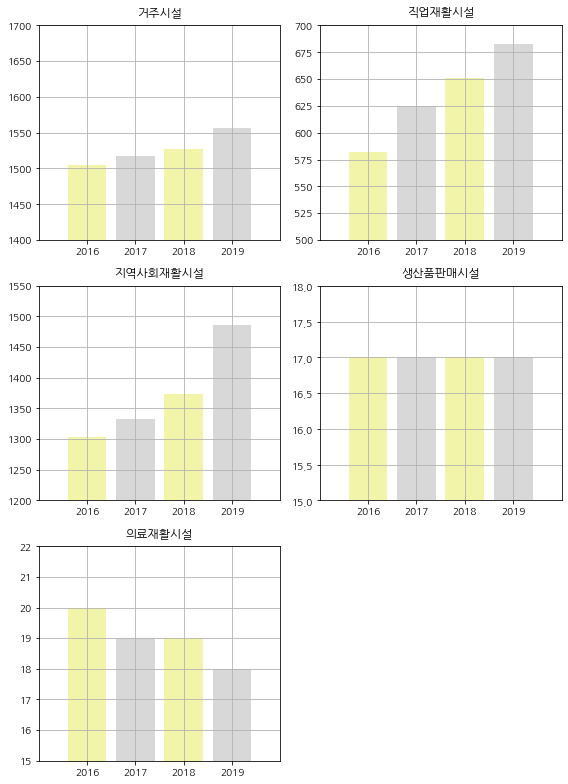

In [16]:
# 장애인복지시설 개별 시각화

# x축
x = (2016, 2017, 2018, 2019)

plt.rcParams['figure.figsize']=(8,11)

# 거주시설
plt.xticks(x)
gp1 = plt.subplot(321)
graph1 = plt.bar(x, cat1, color=['#F2F5A9', '#D8D8D8', '#F2F5A9', '#D8D8D8'])
plt.grid(True)
gp1.axis([2015, 2020, 1400, 1700])
plt.title("거주시설", loc='center', pad=10)

# 직업재활시설
plt.xticks(x)
gp2 = plt.subplot(322)
graph2 = plt.bar(x, cat2, color=['#F2F5A9', '#D8D8D8', '#F2F5A9', '#D8D8D8'])
plt.grid(True)
gp2.axis([2015, 2020, 500, 700])
plt.title("직업재활시설", loc='center', pad=10)

# 지역사회재활시설
plt.xticks(x)
gp3 = plt.subplot(323)
graph3 = plt.bar(x, cat3, color=['#F2F5A9', '#D8D8D8', '#F2F5A9', '#D8D8D8'])
plt.grid(True)
gp3.axis([2015, 2020, 1200, 1550])
plt.title("지역사회재활시설", loc='center', pad=10)

# 생산품판매시설
plt.xticks(x)
gp4 = plt.subplot(324)
graph4 = plt.bar(x, cat4, color=['#F2F5A9', '#D8D8D8', '#F2F5A9', '#D8D8D8'])
plt.grid(True)
gp4.axis([2015, 2020, 15, 18])
plt.title("생산품판매시설", loc='center', pad=10)

# 의료재활시설
plt.xticks(x)
gp5 = plt.subplot(325)
graph5 = plt.bar(x, cat5, color=['#F2F5A9', '#D8D8D8', '#F2F5A9', '#D8D8D8'])
plt.grid(True)
gp5.axis([2015, 2020, 15, 22])
plt.title("의료재활시설", loc='center', pad=10)
plt.xticks(x)

plt.tight_layout()
# plt.show()
plt.savefig('장애인복지시설현황 개별 시각화.png', dpi=200, facecolor='#FFFFFF')

In [7]:
# 년도별 토탈값
total_2015 = 3327

total_2016 = data_drop.iloc[0].sum()
total_2017 = data_drop.iloc[1].sum()
total_2018 = data_drop.iloc[2].sum()
total_2019 = data_drop.iloc[3].sum()

print(f"토탈 값\n2015 : {total_2015}\n2016 : {total_2016}\n2017 : {total_2017}\n2018 : {total_2018}\n2019 : {total_2019}")

토탈 값
2015 : 3327
2016 : 3427
2017 : 3511
2018 : 3587
2019 : 3761


In [8]:
# 전년도 대비 증가율

up_2019 = ((total_2019 - total_2018) / total_2018) * 100
up_2018 = ((total_2018 - total_2017) / total_2017) * 100
up_2017 = ((total_2017 - total_2016) / total_2016) * 100
up_2016 = ((total_2016 - total_2015) / total_2015) * 100

print(f"증가률\n2016 : {up_2016}\n2017 : {up_2017}\n2018 : {up_2018}\n2019 : {up_2019}")

증가률
2016 : 3.005710850616171
2017 : 2.451123431572804
2018 : 2.1646254628311024
2019 : 4.850850292723725


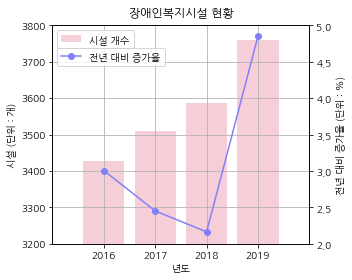

In [9]:
# 시각화 (년도별 토탈값 : 막대그래프 / 전년도 대비 증가율 : 꺾은선 그래프)
plt.rcParams['figure.figsize']=(5,4)

# 년도별 개수
bar_y = (total_2016, total_2017, total_2018, total_2019)
# 전년도 대비 증가율
plot_y = (up_2016, up_2017, up_2018, up_2019)

# 1번
fig, ax1 = plt.subplots()
# 눈금 간격
ax1.axis([2015, 2020, 3200, 3800])
# 라벨
ax1.set_xlabel("년도")
ax1.set_ylabel("시설 (단위 : 개)")
# 눈금
ax1.grid(True)
# 그래프 생성
ax1.bar(x, bar_y, color='#F6CED8', label='시설 개수')

# 2번
ax2 = ax1.twinx()
# 라벨
ax2.set_ylabel("전년 대비 증가율 (단위 : %)")
# 눈금 간격
ax2.axis([2015, 2020, 2, 5])
# 그래프 생성
ax2.plot(x, plot_y, color='#8181F7', marker='o', label='전년 대비 증가율')

# X축 간격
plt.xticks([2016, 2017, 2018, 2019])
# 제목
plt.title("장애인복지시설 현황", loc='center', pad=10)
# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92))

plt.tight_layout()
# plt.show()
plt.savefig('장애인복지시설현황 시각화.png', dpi=200, facecolor='#FFFFFF')